In [1]:
# ==== 1) load packages ====
%matplotlib inline
import numpy as np
import pandas as pd
import math
import glob
from sklearn.metrics import ndcg_score
from sklearn.preprocessing import StandardScaler
import torch
import os
os.chdir(
    # "/home/yliu420/Project/Belief-Elicitation-on-LLM-postrelease/analysis"
    "/Users/jingyi/Research/FYP/LLM/conjoint_openai/Belif-Elicitation-on-LLM-postrelease/analysis"
)
from analysis_pkg.preprocess import *
from analysis_pkg.models import *
from analysis_pkg.visualization_FA import *
from llm_belief.analysis import visualize_probability_distribution
torch.manual_seed(2025)

In [2]:
scored_df = pd.read_csv('../data/scored_profiles_shuffled.csv')
real_df = pd.read_csv('../data/scored_real_profiles.csv')
score_models = [
    # 'MLP_score',
    # 'MLP_attention_score',
    'Logistic_regression_score',
    # 'adplasso_interaction_thres0.0001',
    # 'adplasso_interaction_square_thres0.0001',
    # 'adplasso_square_thres0.0001',
    # 'adplasso_interaction_square_thres0.001',
    # 'XGBoost',
    # 'LogitSquare'
]
feature_names = scored_df.columns[:10].tolist()

# Take 20,000 profiles to draw a smooth plot

In [3]:
df_train = scored_df.iloc[:200000,:].copy()
X_train = preprocess_test(df_train.iloc[:,:10])
X_test = preprocess_test(real_df.iloc[:,:10])
df_full = pd.concat([df_train, real_df], axis=0).reset_index(drop=True)

Saved: ../data/FA_loading/fa_varimax_200k.csv

Top features for Factor 1 (by |loading|):
                                  feature        F1        F2
                  screen size (in inches) -0.060200 -0.014382
                        thickness (in mm) -0.059546 -0.000664
 rear camera main lens resolution (in MP)  0.056777 -0.037458
battery life (in hours of video playback)  0.033040  0.022435
                                      RAM  0.016702 -0.037258
  rear camera longest focal length (in x) -0.016344  0.001558
                         ultrawide camera  0.007851  0.035670
                                    price  0.006773  0.010478
          front camera resolution (in MP) -0.005260 -0.040203
                Geekbench multicore score -0.002930  0.002558

Top features for Factor 2 (by |loading|):
                                  feature        F1        F2
          front camera resolution (in MP) -0.005260 -0.040203
 rear camera main lens resolution (in MP)  0.056777 -0.037458


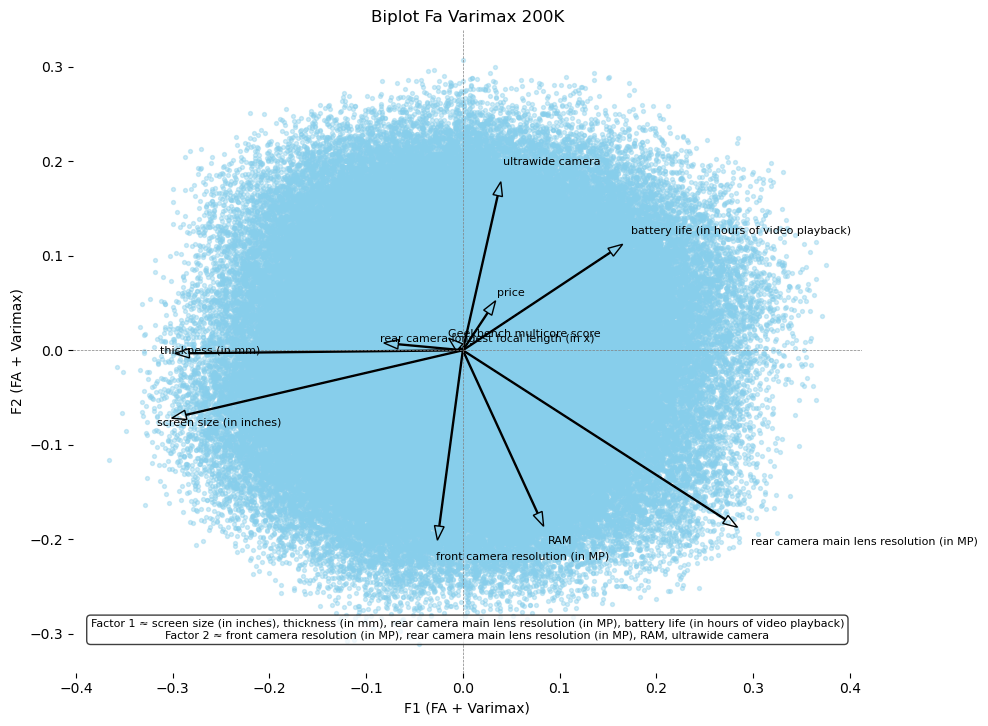

In [4]:
fa_res = fa_varimax_reduce(
    X_train=X_train,
    X_test=X_test,
    n_components=2,
    feature_names=feature_names,
    save_loadings_csv_path="../data/FA_loading/fa_varimax_200k.csv",
    random_state=2025
)
visualize_feature_contributions(
    X_train=X_train,
    feature_names=feature_names,
    save_path="../plot/biplot_fa_varimax_200k.png",
    fa_result=fa_res
)

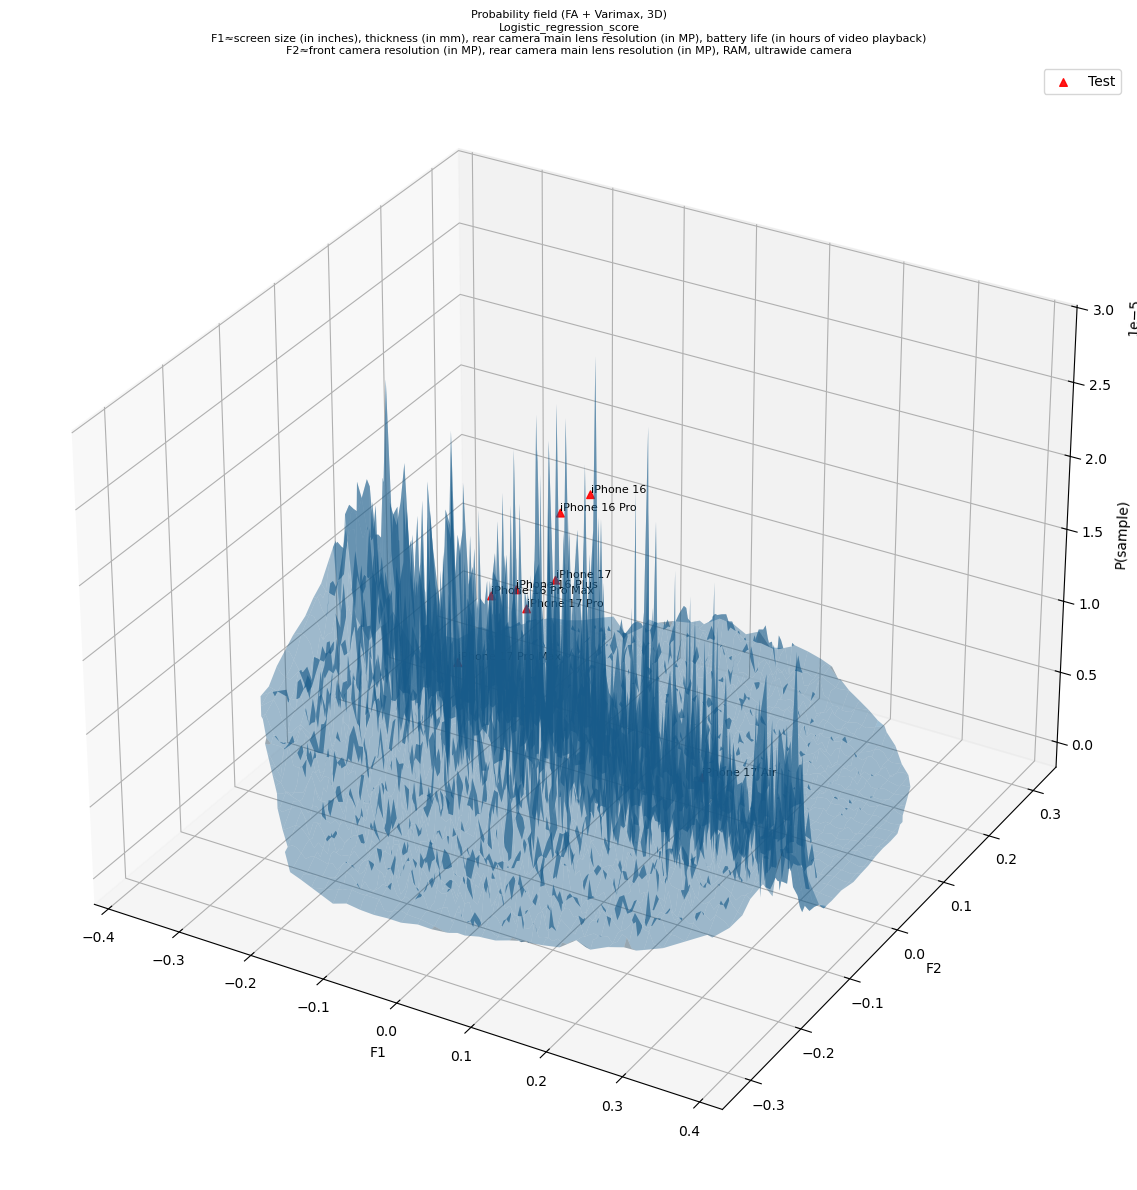

In [5]:
for model_name in score_models:
    scores_train = df_train[model_name].values
    scored_test = real_df[model_name].values
    scores = np.concatenate([scores_train, scored_test], axis=0)
    # df_full.iloc[represent_idx,:].to_csv(f"../data/analysis_representative_FA/FA_heatmap_{model_name}_200k.csv", index=True)
    _ = visualize_probability_distribution(
        X_full=torch.cat([X_train, X_test], dim=0),
        scores=scores,
        num_test=8,
        plot_kind="3d",
        fig_name=f"FA_3d_{model_name}_200k.png",
        fa_result=fa_res,
        score_model=model_name,
        test_idx=real_df['profile_id'].values.tolist(),
    )

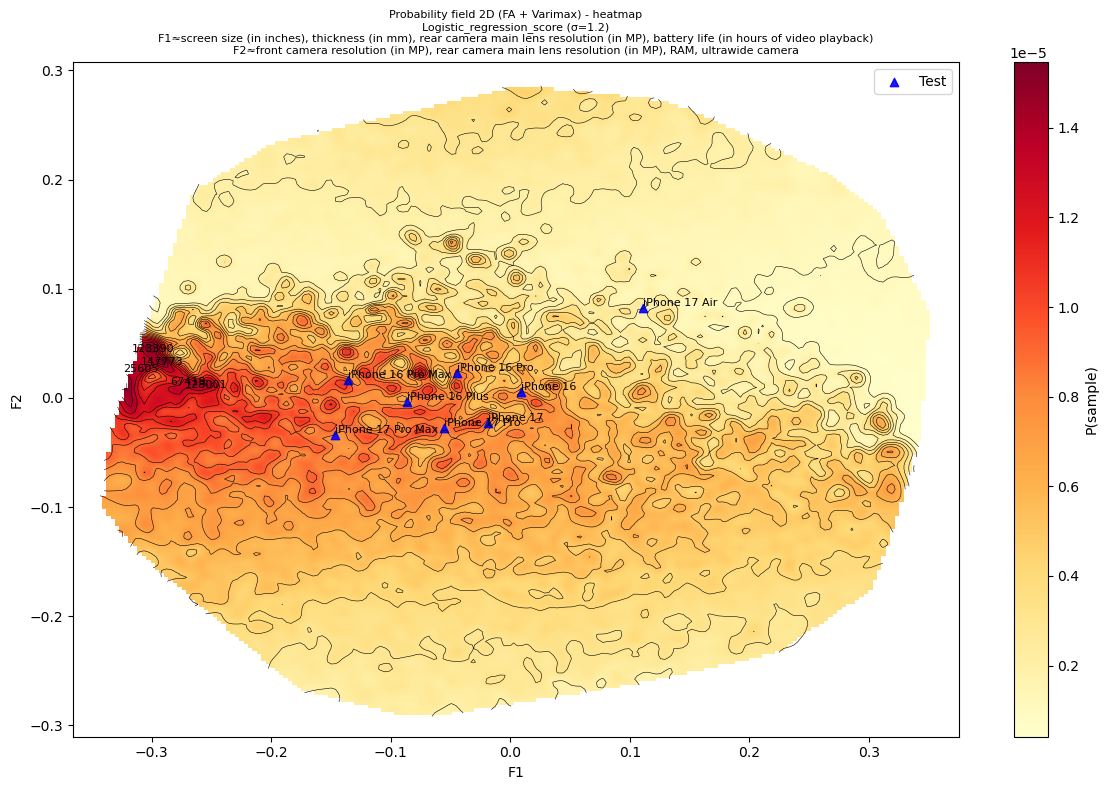

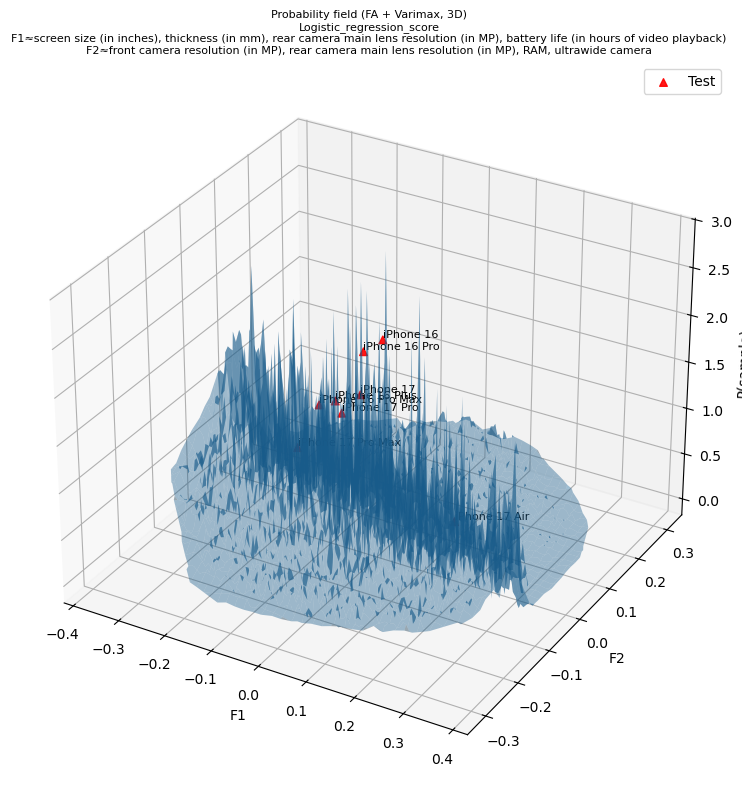

In [5]:
for model_name in score_models:
    scores_train = df_train[model_name].values
    scored_test = real_df[model_name].values
    scores = np.concatenate([scores_train, scored_test], axis=0)
    represent_idx = visualize_probability_distribution(
        X_full=torch.cat([X_train, X_test], dim=0),
        scores=scores,
        num_test=8,
        plot_kind="heatmap",
        smooth_sigma=1.2,
        fig_name=f"FA_heatmap_{model_name}_200k.png",
        fa_result=fa_res,
        score_model=model_name,
        represent_method="peaks",
        test_idx=real_df['profile_id'].values.tolist(),
    )
    represent_idx = represent_idx.representative_indices
    df_full.iloc[represent_idx,:].to_csv(f"../data/analysis_representative_FA/FA_heatmap_{model_name}_200k.csv", index=True)
    _ = visualize_probability_distribution(
        X_full=torch.cat([X_train, X_test], dim=0),
        scores=scores,
        num_test=8,
        plot_kind="3d",
        fig_name=f"FA_3d_{model_name}_200k.png",
        fa_result=fa_res,
        score_model=model_name,
        test_idx=real_df['profile_id'].values.tolist(),
    )

In [9]:
scores_stable.max()

0.0

In [7]:
scores_stable = scores - scores.max()
w = np.exp(scores_stable)
probs = w / w.sum()
# return probs, scores_stable, sco

In [8]:
probs.max()

5.349411128323746e-05

# Take top 1000 profiles within 20,000 to draw a concentrate plot

Saved: ../data/FA_loading/fa_varimax_MLP_attention_score_top1000.csv

Top features for Factor 1 (by |loading|):
                                  feature        F1        F2
          front camera resolution (in MP)  0.604840 -0.042826
                        thickness (in mm)  0.126369  0.109916
                  screen size (in inches) -0.108368  0.435730
                                      RAM -0.096725 -0.128778
  rear camera longest focal length (in x) -0.082145  0.072476
                                    price  0.055689 -0.077205
battery life (in hours of video playback)  0.041105 -0.016336
 rear camera main lens resolution (in MP) -0.031162  0.002010
                Geekbench multicore score  0.004434  0.031914
                         ultrawide camera -0.000490 -0.000978

Top features for Factor 2 (by |loading|):
                                  feature        F1        F2
                  screen size (in inches) -0.108368  0.435730
                                      R

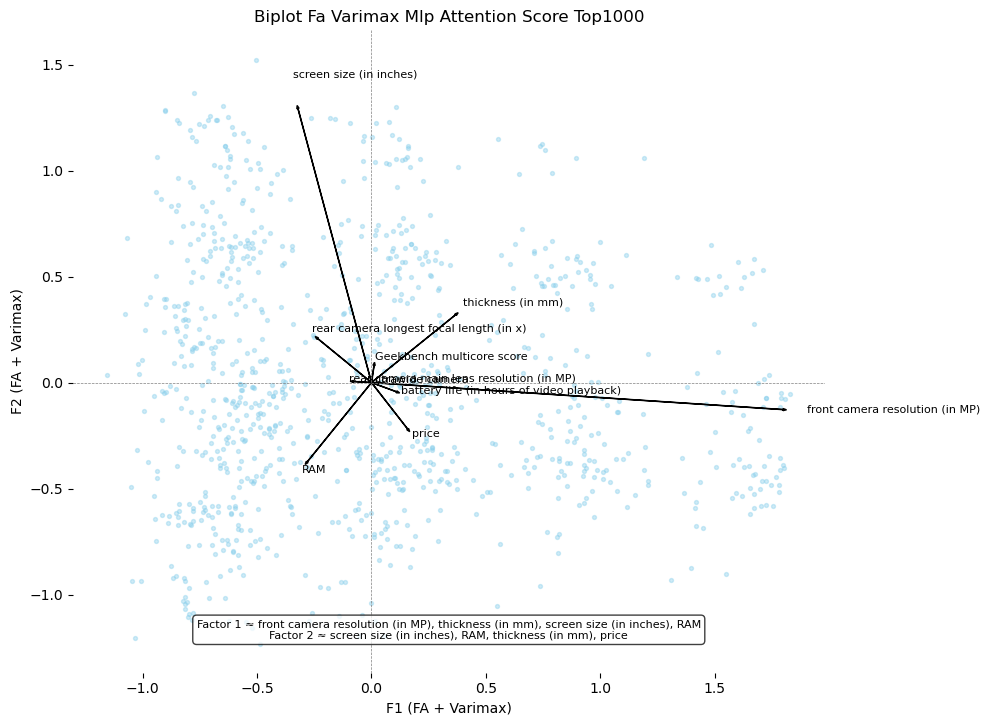

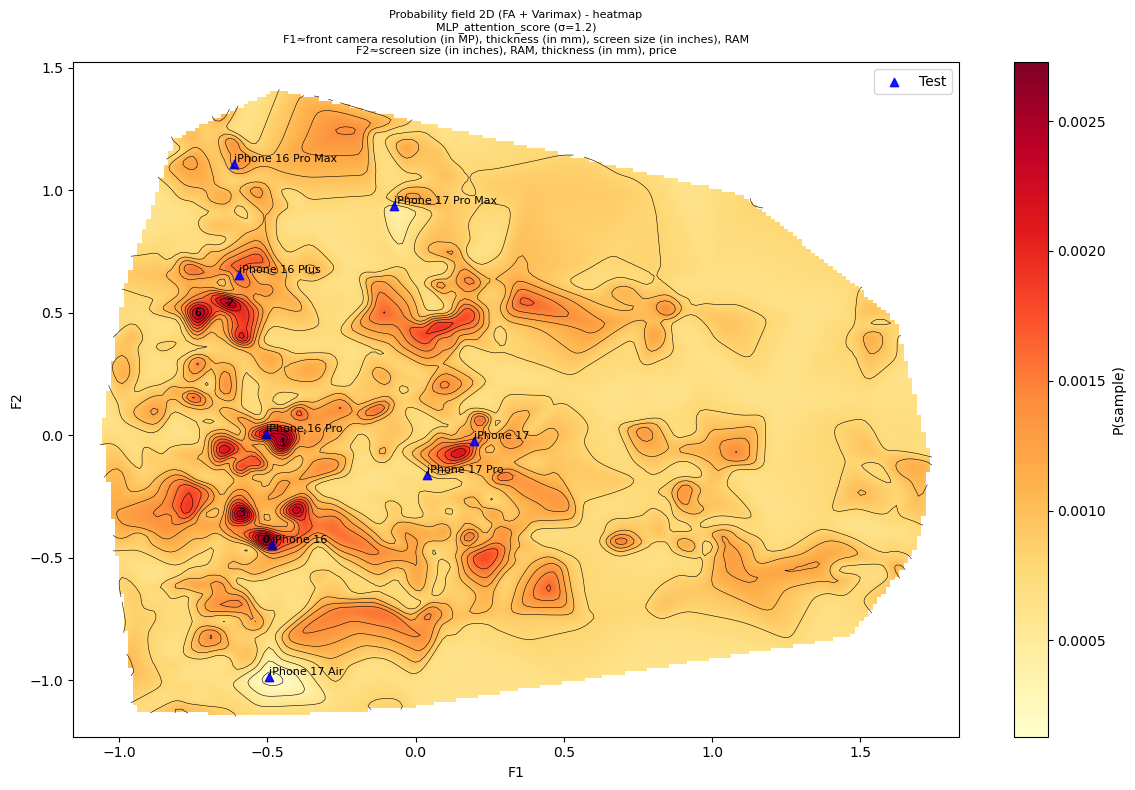

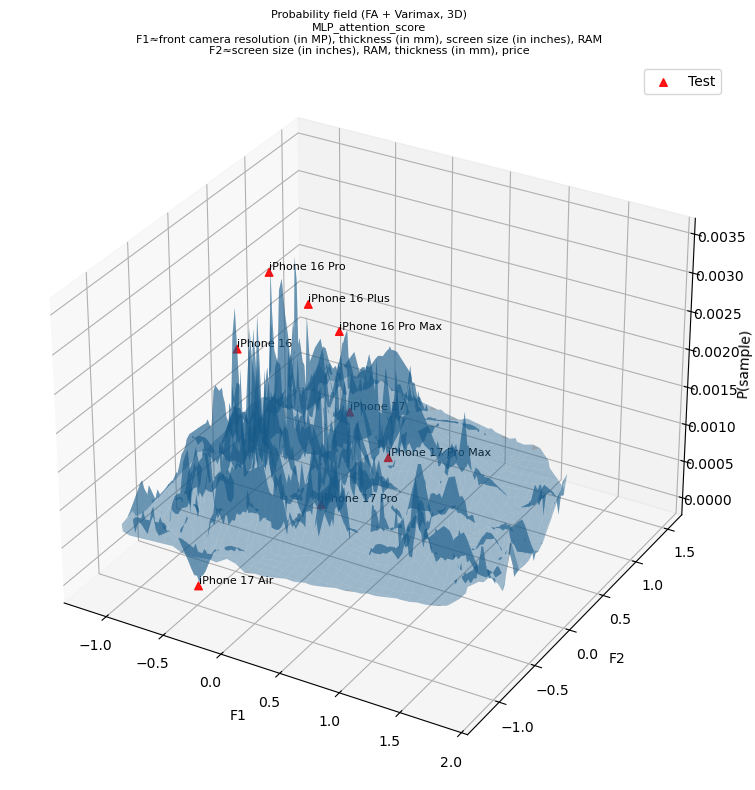

Saved: ../data/FA_loading/fa_varimax_Logistic_regression_score_top1000.csv

Top features for Factor 1 (by |loading|):
                                  feature        F1        F2
 rear camera main lens resolution (in MP)  0.591641 -0.072317
  rear camera longest focal length (in x) -0.162554 -0.060565
                                      RAM -0.158328 -0.170172
          front camera resolution (in MP) -0.155139 -0.111668
                Geekbench multicore score  0.118707  0.190222
                        thickness (in mm)  0.114078  0.080929
                  screen size (in inches) -0.045278  0.688733
                                    price  0.040606  0.021103
battery life (in hours of video playback)  0.003174  0.023517
                         ultrawide camera  0.001023  0.001156

Top features for Factor 2 (by |loading|):
                                  feature        F1        F2
                  screen size (in inches) -0.045278  0.688733
                Geekbench multico

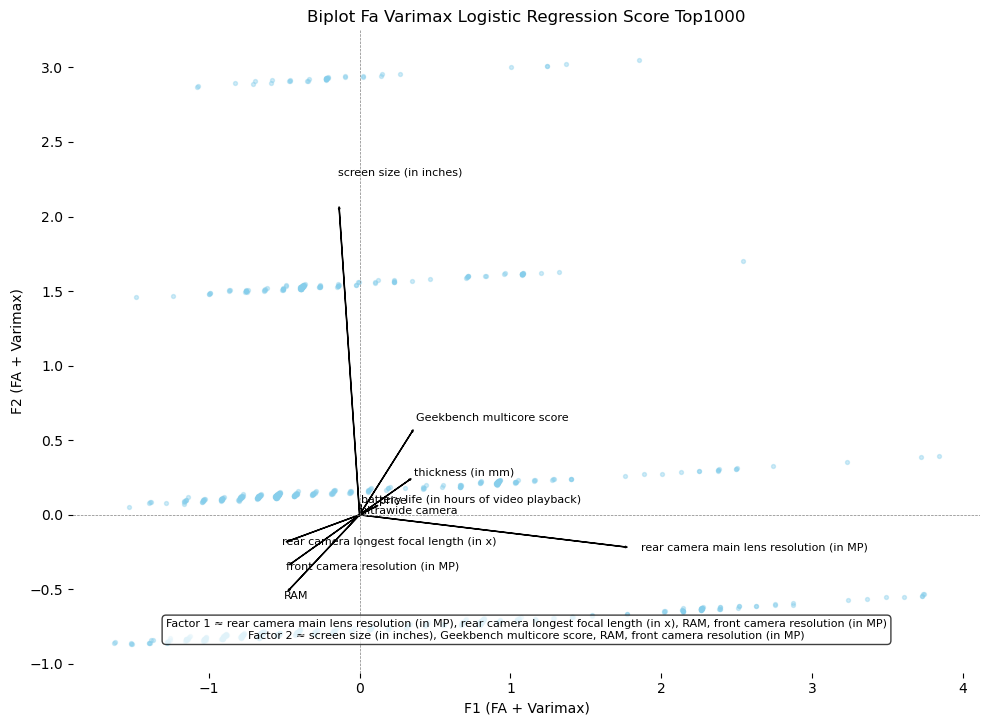

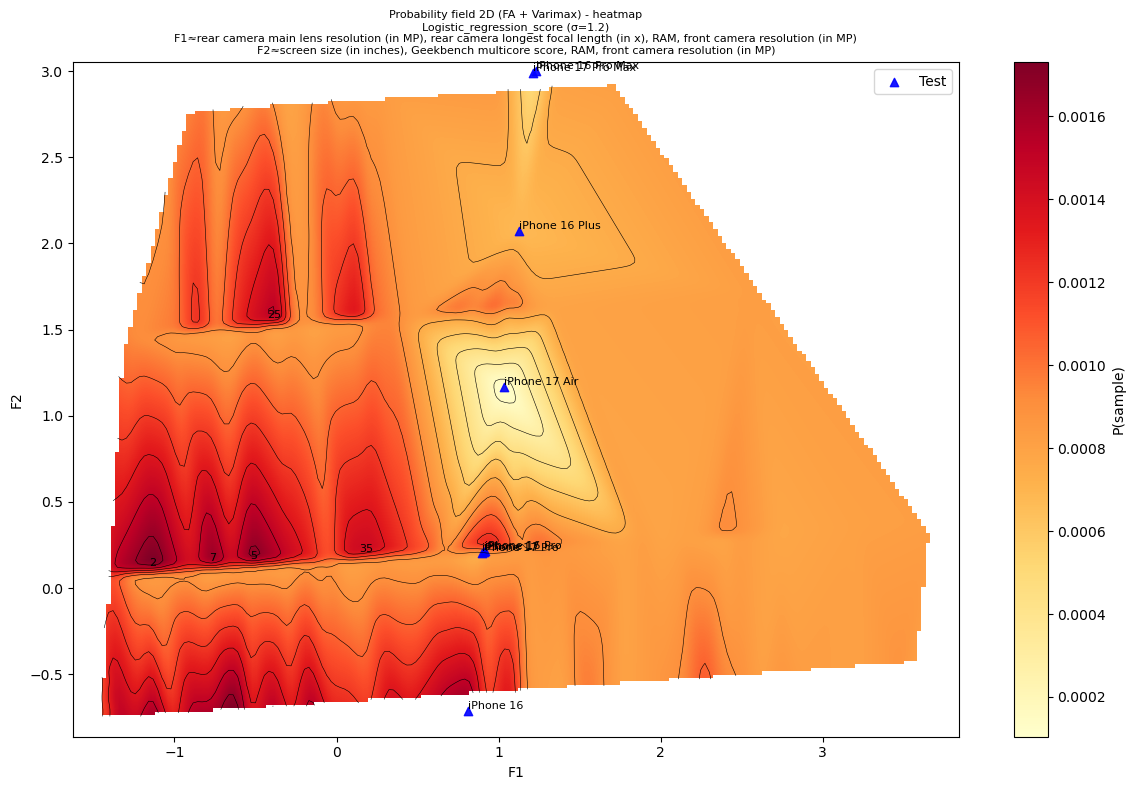

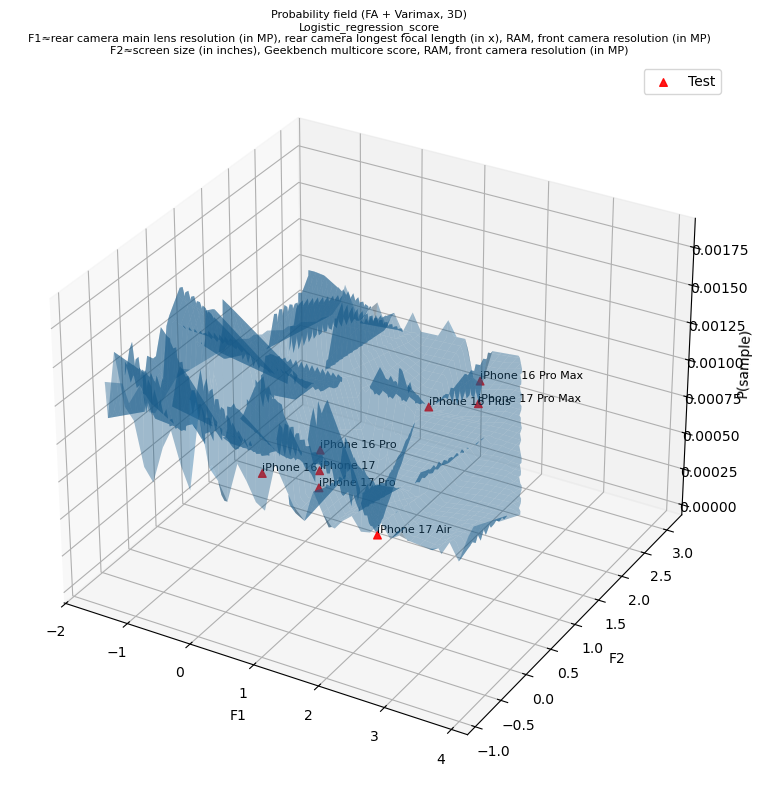

Saved: ../data/FA_loading/fa_varimax_adplasso_interaction_square_thres0.0001_top1000.csv

Top features for Factor 1 (by |loading|):
                                  feature        F1        F2
                  screen size (in inches)  0.557242 -0.124164
          front camera resolution (in MP) -0.167438 -0.112177
                Geekbench multicore score  0.083715 -0.633954
                        thickness (in mm)  0.080437  0.022669
  rear camera longest focal length (in x)  0.065553  0.038995
 rear camera main lens resolution (in MP) -0.059470 -0.066204
battery life (in hours of video playback) -0.019609  0.064039
                                    price  0.018019  0.087459
                                      RAM -0.010320  0.026197
                         ultrawide camera -0.000007 -0.001877

Top features for Factor 2 (by |loading|):
                                  feature        F1        F2
                Geekbench multicore score  0.083715 -0.633954
                  s

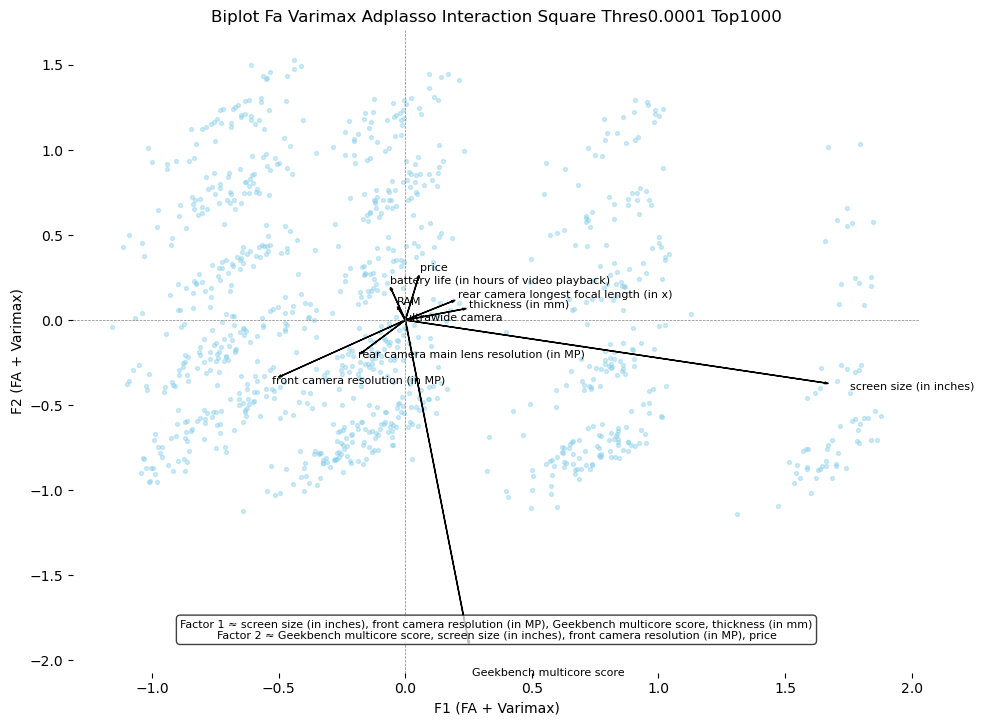

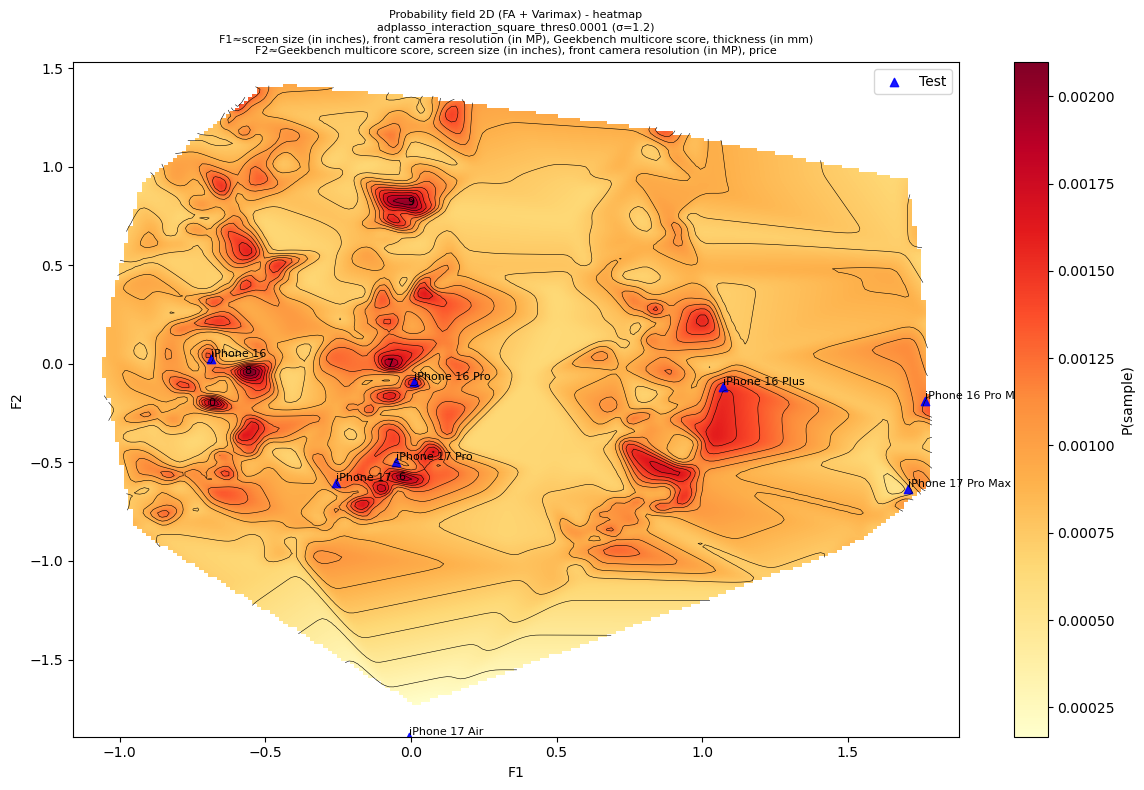

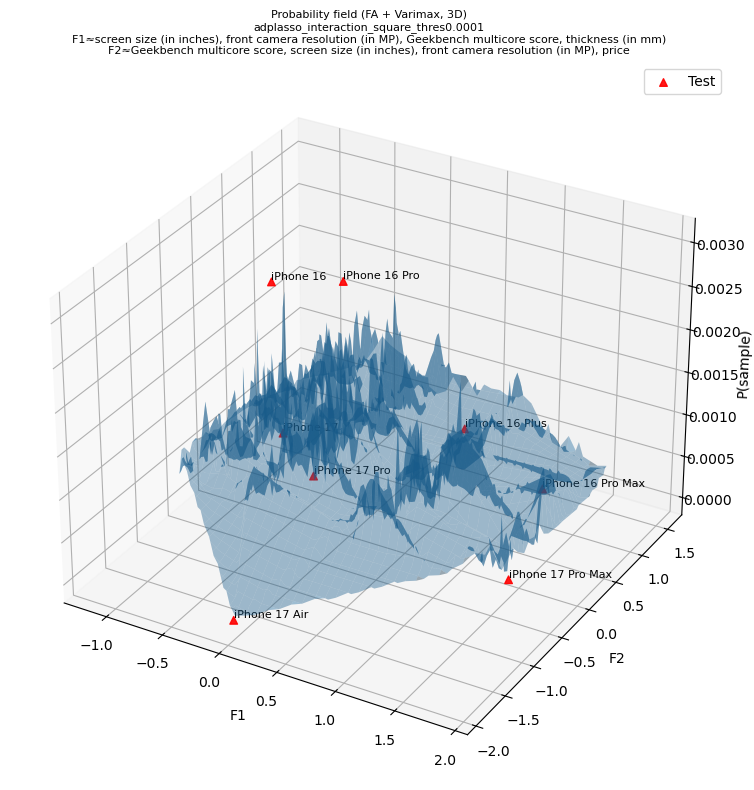

In [15]:
for model_name in score_models:
    df_train = scored_df.iloc[:20000,:].copy()
    df_train.sort_values(by=[model_name], ascending=False, inplace=True)
    df_train = df_train.iloc[:1000,:]
    df_full = pd.concat([df_train, real_df], axis=0).reset_index(drop=True)
    scores_train = df_train[model_name].values
    scored_test = real_df[model_name].values
    X_train = preprocess_test(df_train.iloc[:,:10])
    X_test = preprocess_test(real_df.iloc[:,:10])
    scores = np.concatenate([scores_train, scored_test], axis=0)
    fa_res = fa_varimax_reduce(
        X_train=X_train,
        X_test=X_test,
        n_components=2,
        feature_names=feature_names,
        save_loadings_csv_path=f"../data/FA_loading/fa_varimax_{model_name}_top1000.csv",
        random_state=2025
    )
    visualize_feature_contributions(
        X_train=X_train,
        feature_names=feature_names,
        save_path=f"../plot/biplot_fa_varimax_{model_name}_top1000.png",
        fa_result=fa_res
    )
    represent_idx = visualize_probability_distribution(
        X_full=torch.cat([X_train, X_test], dim=0),
        scores=scores,
        num_test=8,
        plot_kind="heatmap",
        smooth_sigma=1.2,
        fig_name=f"FA_heatmap_{model_name}_top1000.png",
        score_model=model_name,
        fa_result=fa_res,
        represent_method="peaks",
        test_idx=real_df['profile_id'].values.tolist(),
    )
    represent_idx = represent_idx.representative_indices
    df_full.iloc[represent_idx,:].to_csv(f"../data/analysis_representative_FA/FA_heatmap_{model_name}_top1000.csv", index=True)
    _ = visualize_probability_distribution(
        X_full=torch.cat([X_train, X_test], dim=0),
        scores=scores,
        num_test=8,
        plot_kind="3d",
        fig_name=f"FA_3d_{model_name}_top1000.png",
        score_model=model_name,
        fa_result=fa_res,
        test_idx=real_df['profile_id'].values.tolist(),
    )